# <span style="color:#cd0057; font-weight:bold">⬇️Step 1: Import Essential Libraries</span>
<hr>

In [586]:
import numpy as np              
import pandas as pd              
import matplotlib.pyplot as plt  
import seaborn as sns     

# <span style="color:#cd0057; font-weight:bold">🚚Step 2: Load Dataset</span>
<hr>

In [587]:
df = pd.read_csv('csv_files/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# <span style="color:#cd0057; font-weight:bold">🩺Step03: Understand Data frame</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">About Data frame</span>

In [588]:
df.shape

(1599, 12)

In [589]:
df.columns  

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [590]:
describe = df.describe(include='all')
describe.style.background_gradient(cmap='coolwarm')

In [591]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## <span style="color:#0076cd; font-weight:bold">Understand Missing values</span>

In [592]:
df.isnull().sum()    

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <span style="color:#0076cd; font-weight:bold">Find Duplicates</span>

In [593]:
df.duplicated().sum()   

240

## <span style="color:#0076cd; font-weight:bold">Understand Target value</span>

In [594]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# <span style="color:#cd0057; font-weight:bold">🧹Step 4: Data cleaning</span>
<hr>

In [595]:
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

# <span style="color:#cd0057; font-weight:bold">🔭Step 5: Handle Outliers</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">cheack outliers</span>

In [596]:
#finding outliers base on the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

count_out
fixed acidity                41
volatile acidity             19
citric acid                   1
residual sugar              126
chlorides                    87
free sulfur dioxide          26
total sulfur dioxide         45
density                      35
pH                           28
sulphates                    55
alcohol                      12
quality                      27

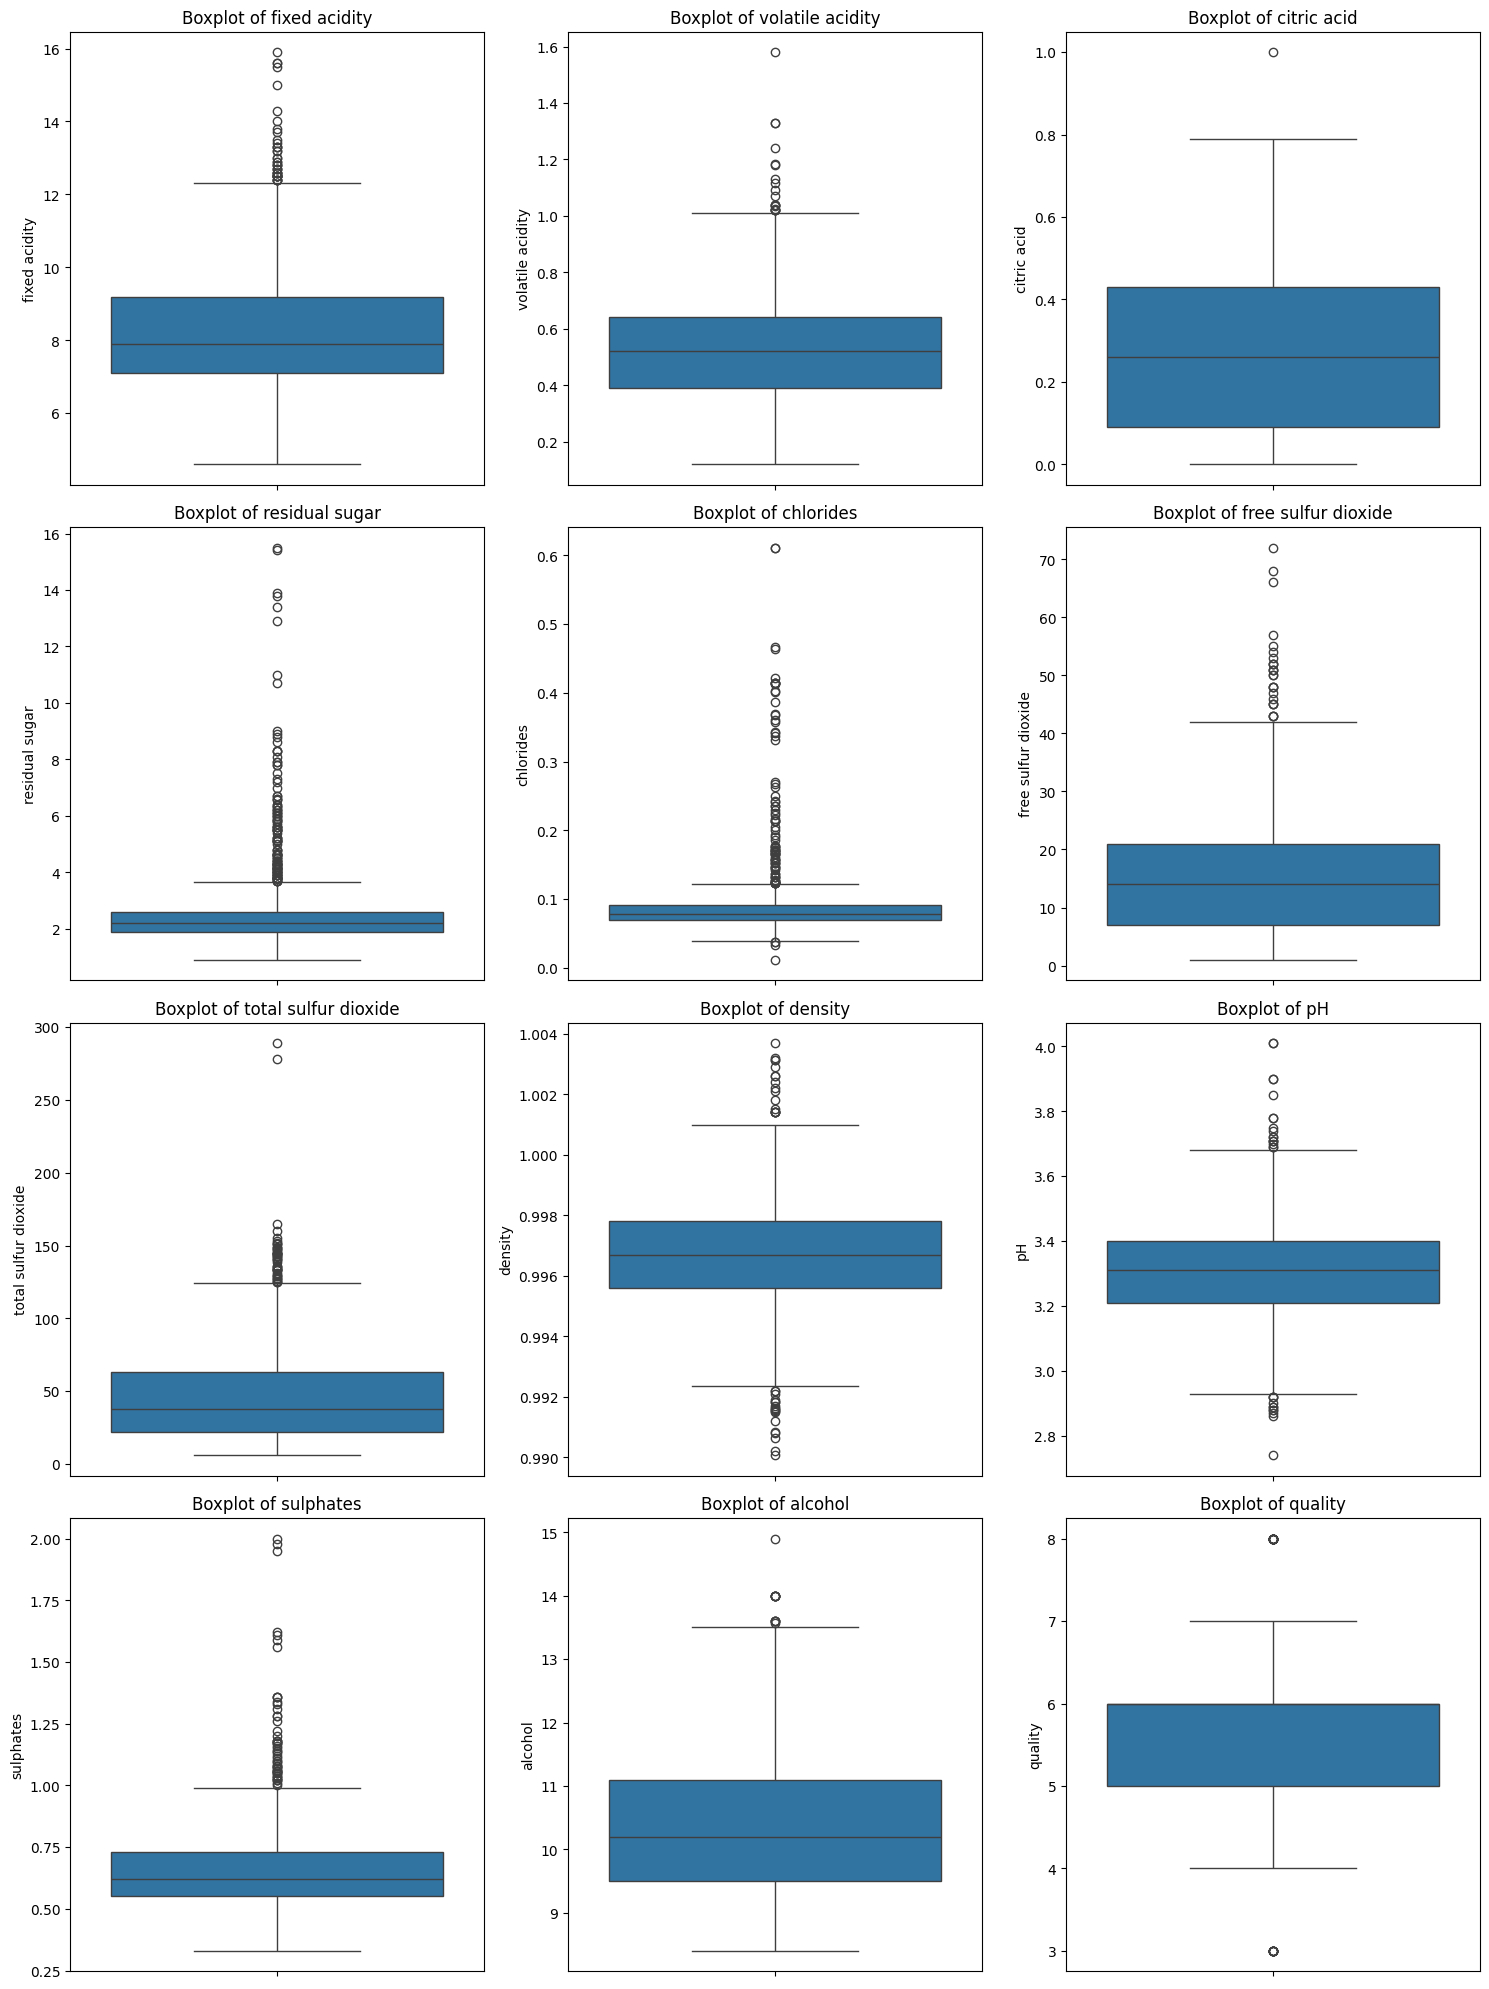

In [597]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Define grid size
num_cols = 3  # Number of columns in the grid
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division to get required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each boxplot in a subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Vertical boxplot
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots if the number of columns is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### <span style="color:#00cd16; font-weight:bold">sulphates outliers</span>

In [598]:
correlation = df[['sulphates', 'quality']].corr()
print(correlation)

           sulphates   quality
sulphates   1.000000  0.248835
quality     0.248835  1.000000


In [599]:
df = df[(df['sulphates']<1.75)]
df.shape

(1356, 12)

In [600]:
correlation = df[['sulphates', 'quality']].corr()
print(correlation)

           sulphates   quality
sulphates   1.000000  0.281751
quality     0.281751  1.000000


### <span style="color:#00cd16; font-weight:bold">residual sugar outliers</span>

In [601]:
correlation = df[['residual sugar', 'quality']].corr()
print(correlation)

                residual sugar  quality
residual sugar         1.00000  0.01455
quality                0.01455  1.00000


In [602]:
df = df[(df['residual sugar']<12)]
df.shape

(1350, 12)

In [603]:
correlation = df[['residual sugar', 'quality']].corr()
print(correlation)

                residual sugar   quality
residual sugar        1.000000  0.033164
quality               0.033164  1.000000


### <span style="color:#00cd16; font-weight:bold">total sulfur dioxide</span>

In [604]:
correlation = df[['total sulfur dioxide', 'quality']].corr()
print(correlation)

                      total sulfur dioxide   quality
total sulfur dioxide              1.000000 -0.178342
quality                          -0.178342  1.000000


In [605]:
df = df[(df['total sulfur dioxide']<200)]
df.shape

(1348, 12)

In [606]:
correlation = df[['total sulfur dioxide', 'quality']].corr()
print(correlation)

                      total sulfur dioxide   quality
total sulfur dioxide              1.000000 -0.204458
quality                          -0.204458  1.000000


# <span style="color:#cd0057; font-weight:bold">📈Step 7: EDA</span>
<hr>

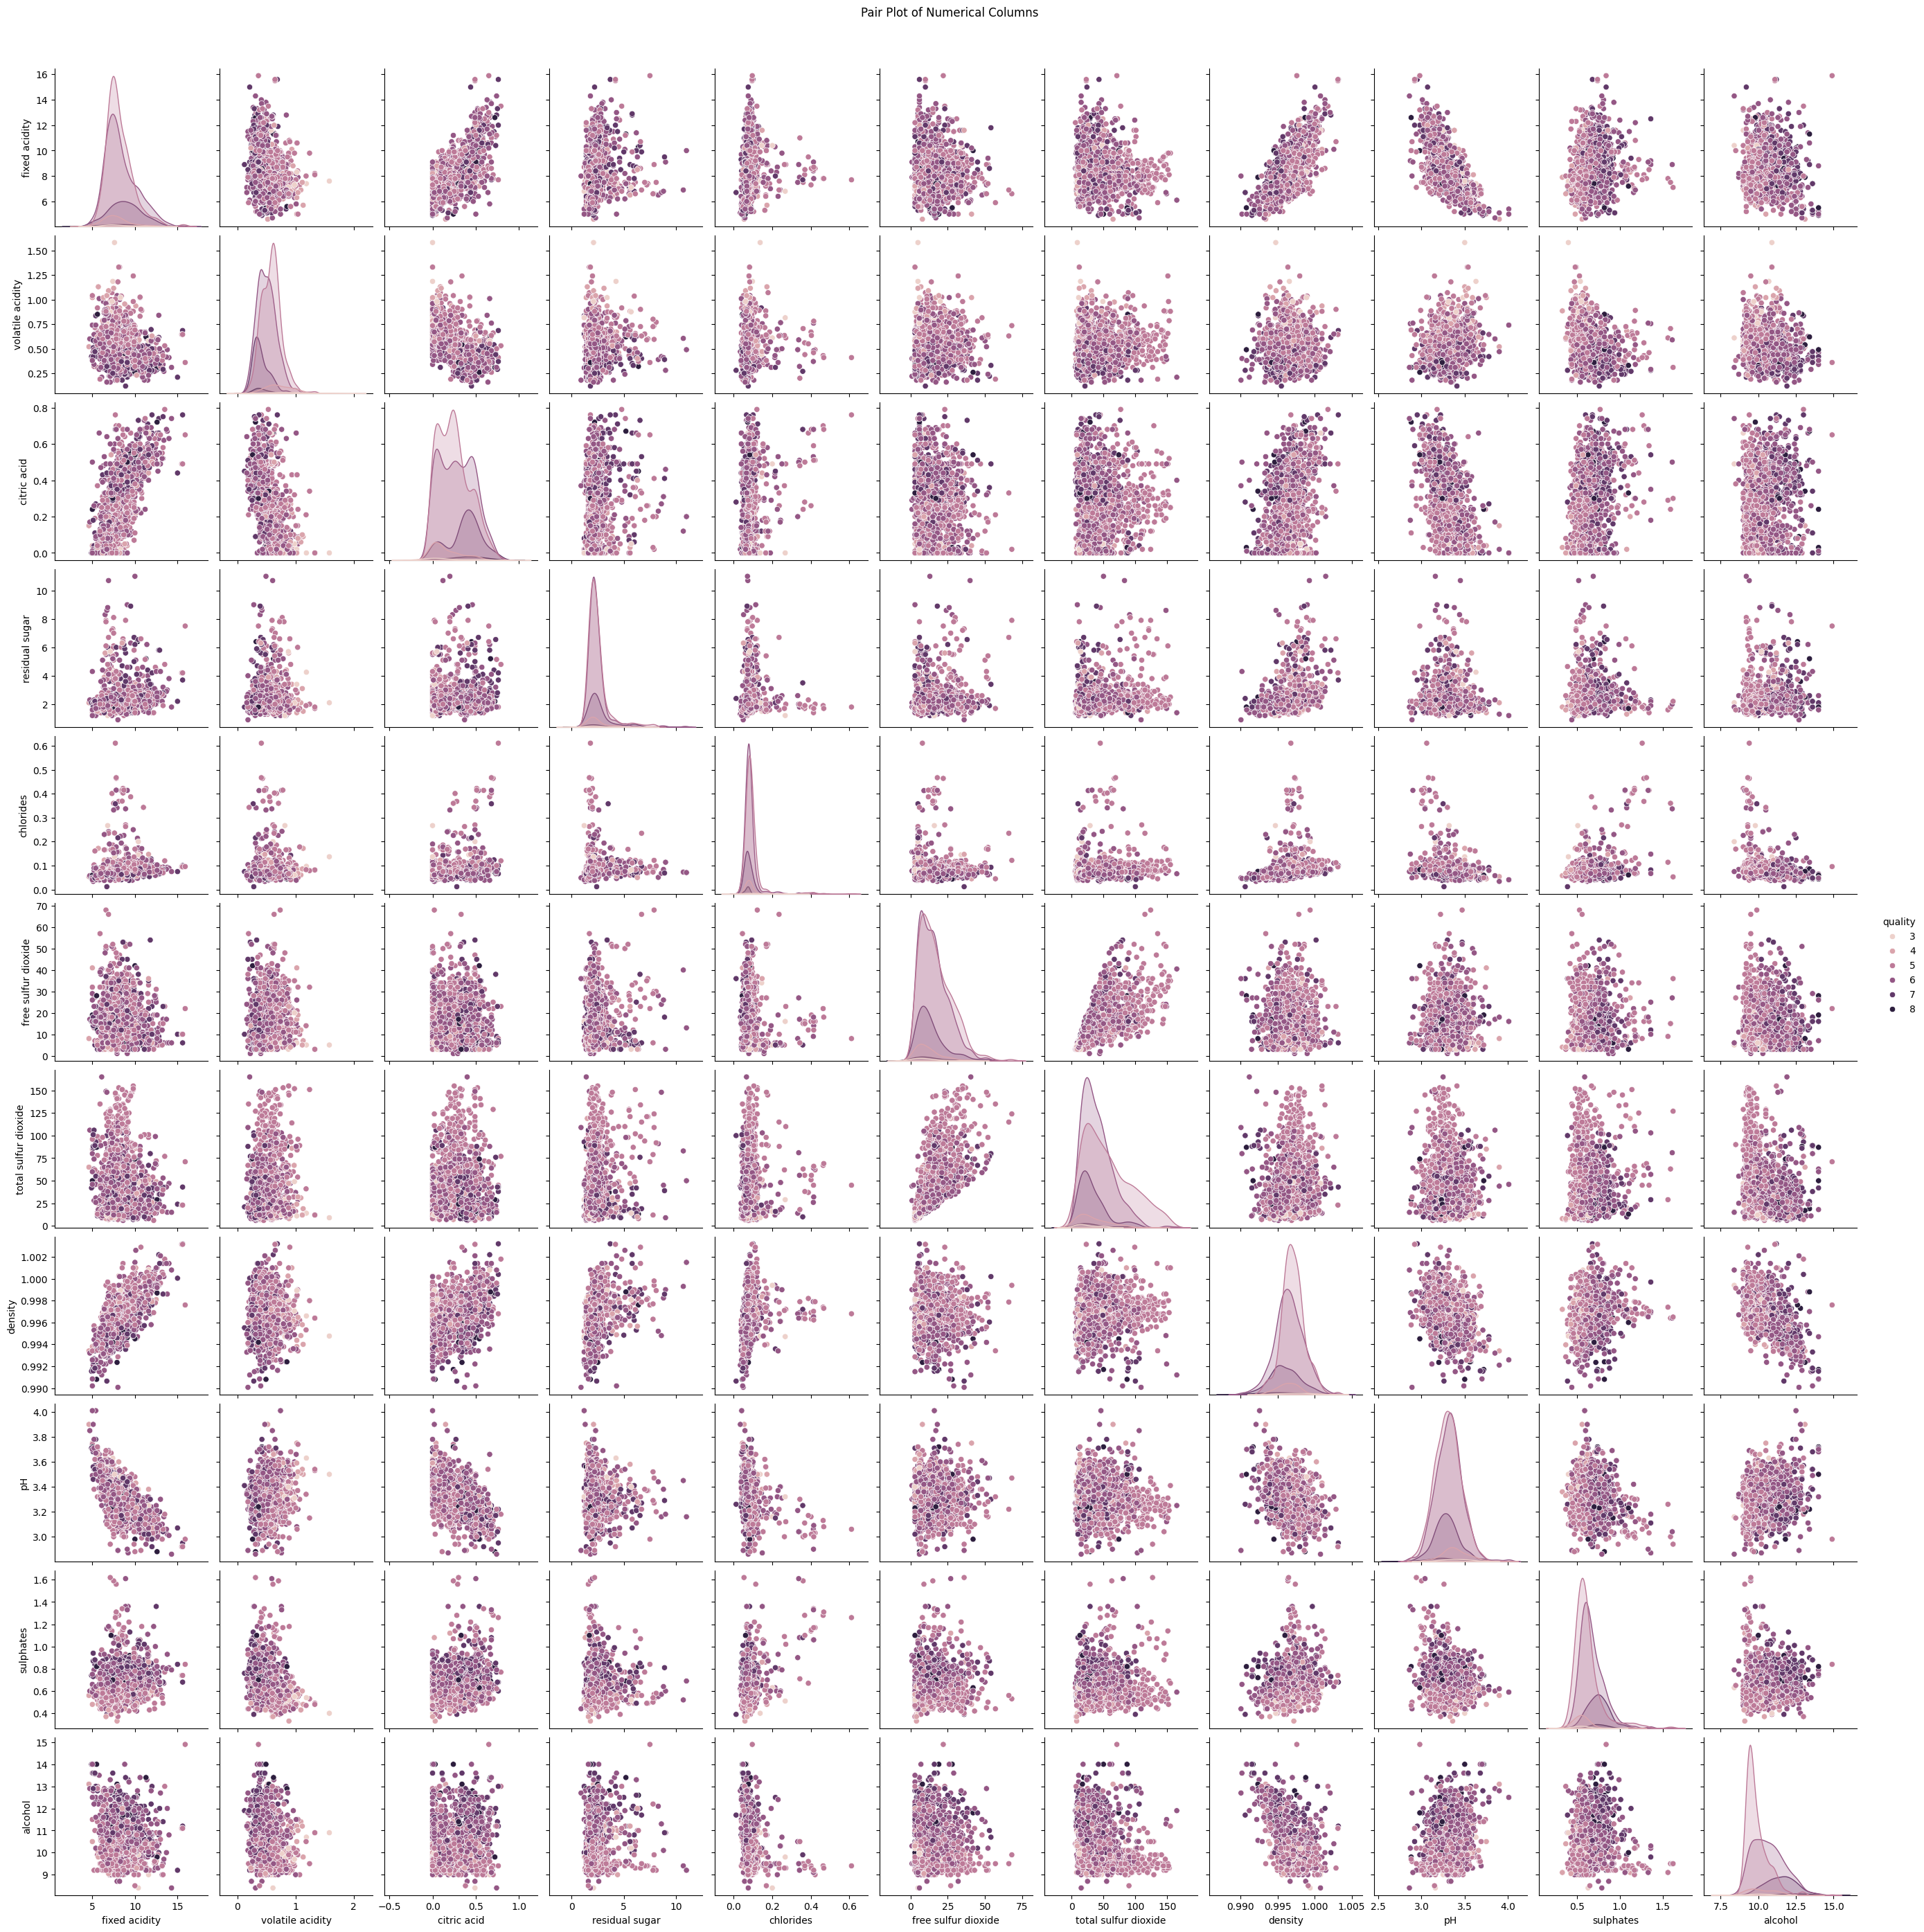

In [607]:
pairplo1 = df

sns.pairplot(pairplo1, hue='quality',  diag_kind='auto')  #hist #kde
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

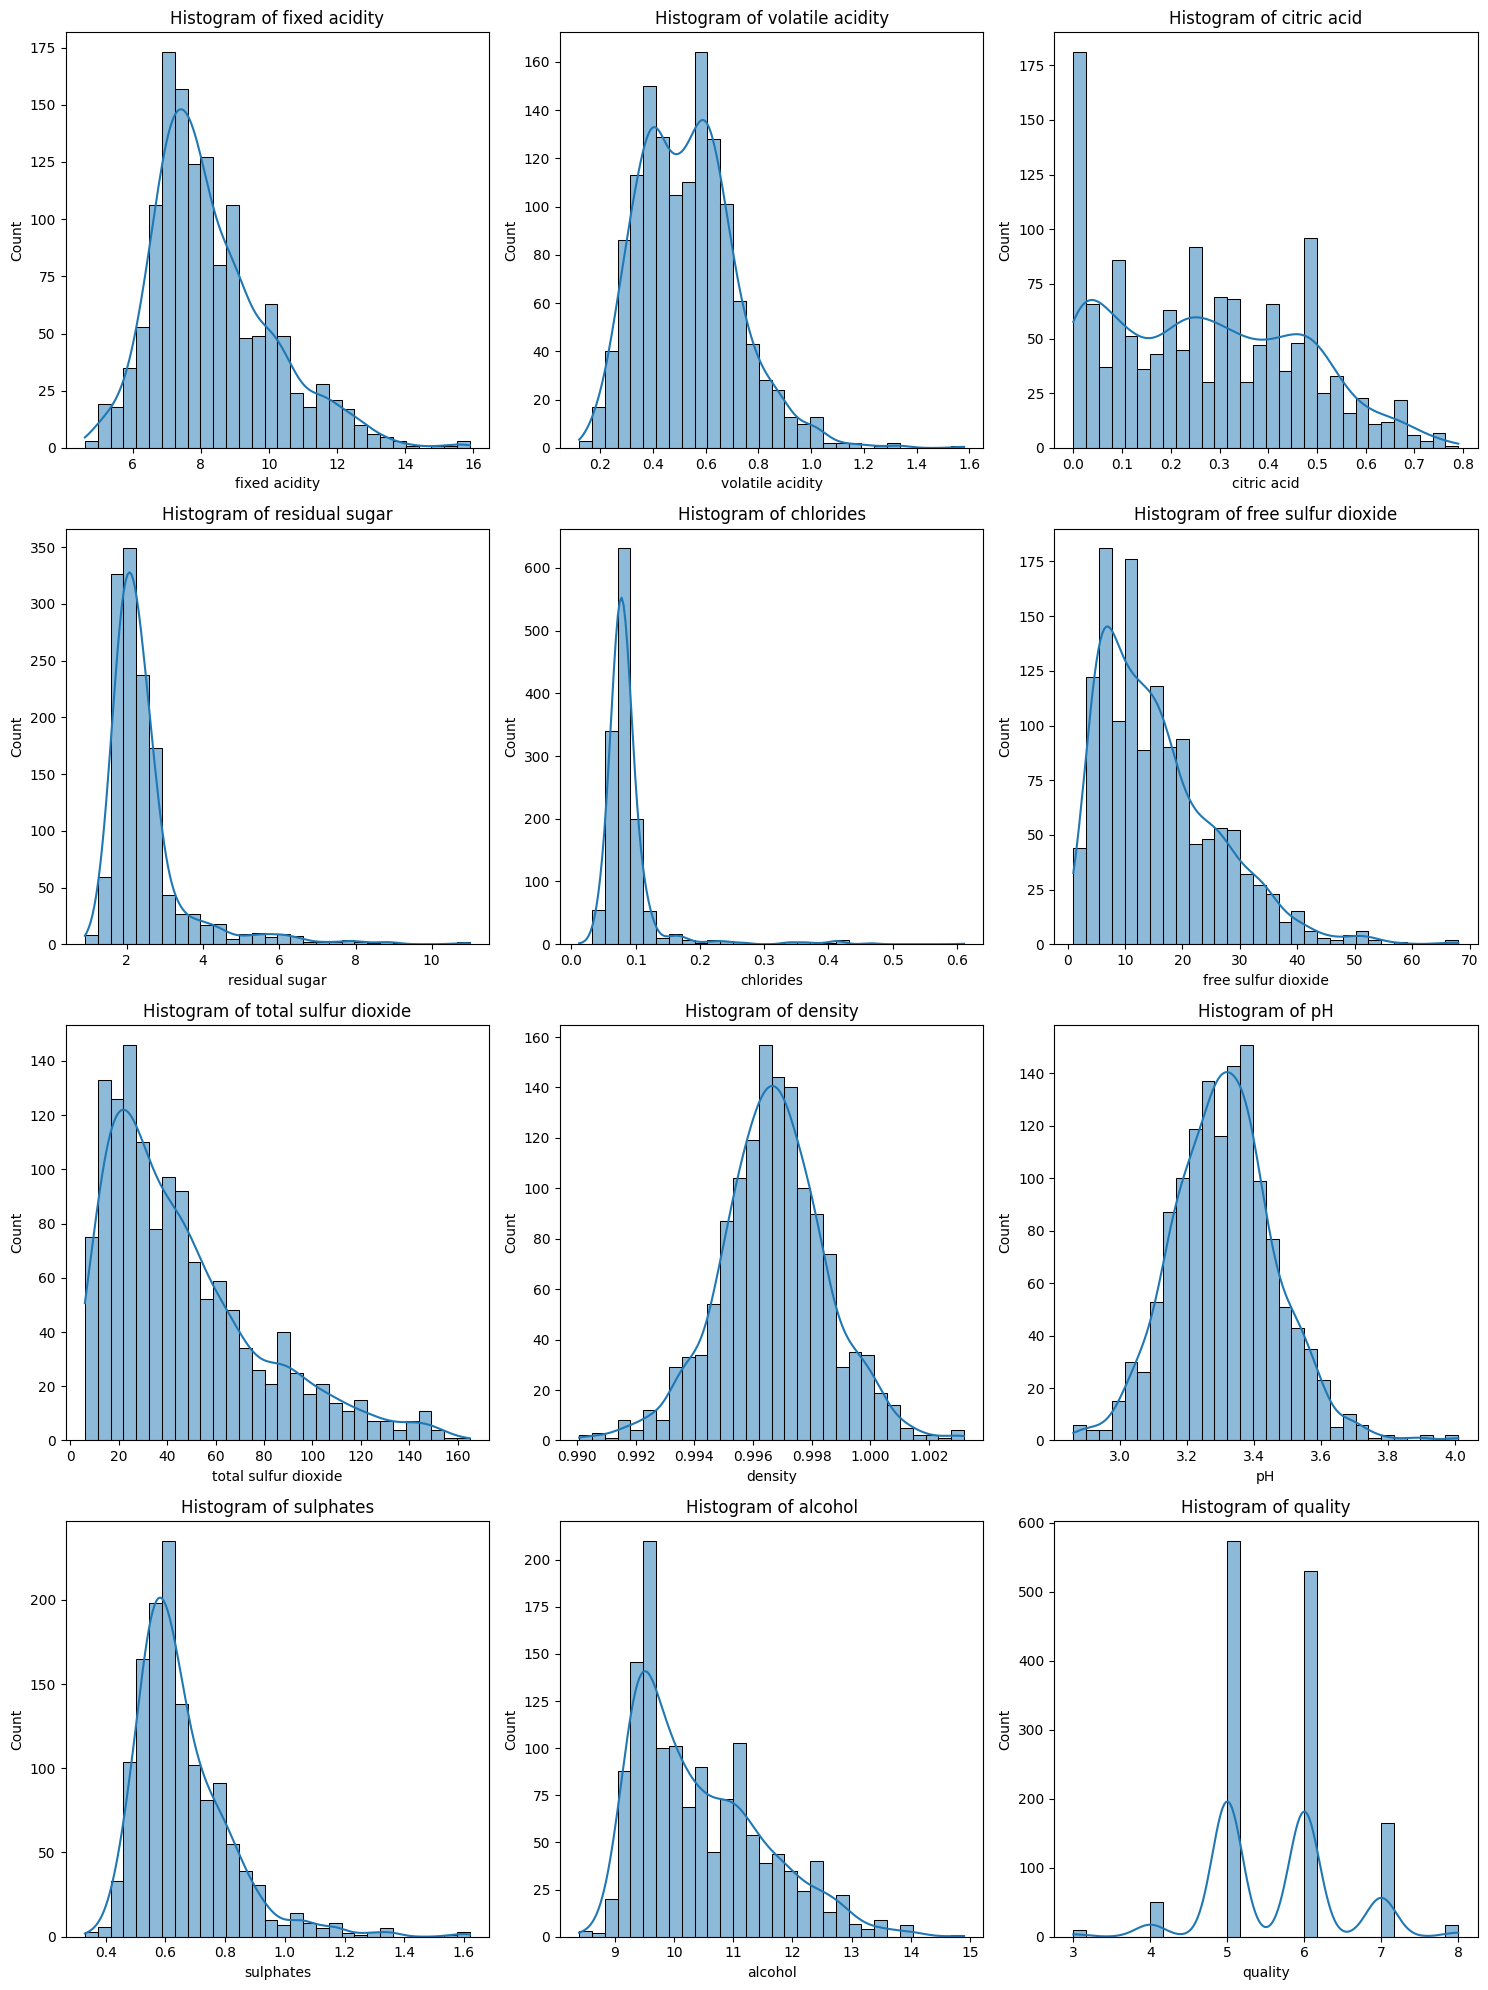

In [608]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Define the number of rows and columns for the grid
num_cols = 3  # Number of columns in the grid
num_rows = -(-len(numeric_columns) // num_cols)  # Calculate rows dynamically (ceil division)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten to loop easily

# Plot each histogram in a subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide unused subplots if the number of columns is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

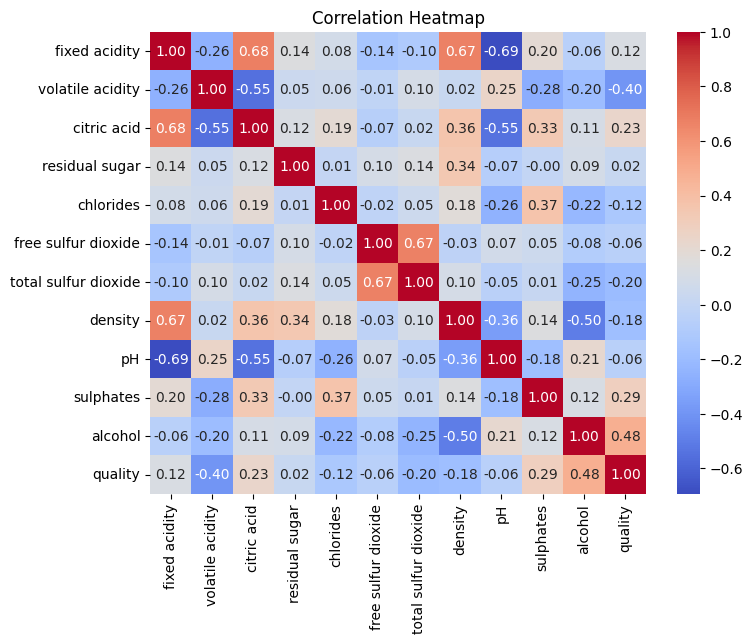

In [609]:
correlation = df.corr() 


plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

## <span style="color:#0076cd; font-weight:bold">feature importance</span>

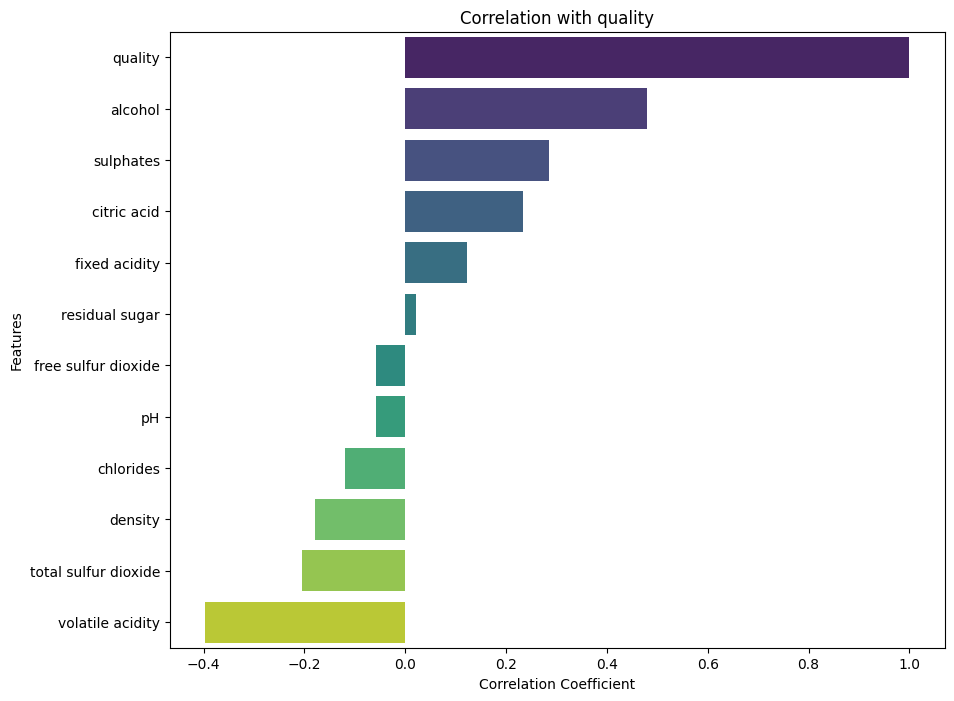

In [610]:
correlation = df.corr(numeric_only=True)[['quality']].sort_values('quality', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='quality', 
    y=correlation.index, 
    data=correlation, 
    hue=correlation.index,  
    palette='viridis', 
    legend=False  
)
plt.title('Correlation with quality')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# <span style="color:#cd0057; font-weight:bold">🛠️Step 8: Feature Eng</span>
<hr>

## <span style="color:#0076cd; font-weight:bold">make Good and Bad objects</span>

In [611]:
df["quality"].value_counts()

quality
5    574
6    531
7    165
4     51
8     17
3     10
Name: count, dtype: int64

In [612]:
def map_quality(score):
    if score <= 6:
        return 0  # Bad
    else:
        return 1  # Good

df['quality_label'] = df['quality'].apply(map_quality)

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_label  
0      9.4        5              0  
1      9.8        5              0  
2      9.8        5              0  
3      9.8        6              0  
5      9.4        5              0

In [613]:
df["quality_label"].value_counts()

quality_label
0    1166
1     182
Name: count, dtype: int64

In [614]:
df.drop(columns=["quality"], inplace=True)

## <span style="color:#0076cd; font-weight:bold">Final features importance</span>

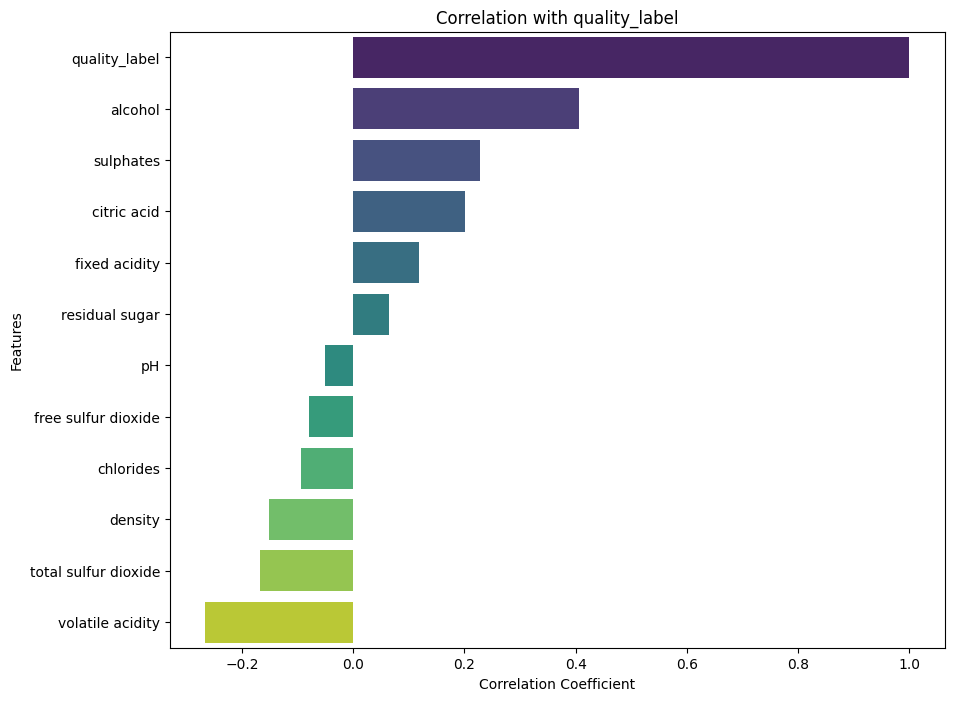

In [615]:
correlation = df.corr(numeric_only=True)[['quality_label']].sort_values('quality_label', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='quality_label', 
    y=correlation.index, 
    data=correlation, 
    hue=correlation.index,  
    palette='viridis', 
    legend=False  
)
plt.title('Correlation with quality_label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# <span style="color:#cd0057; font-weight:bold">🤖Step 9: Modeling</span>
<hr>

### <span style="color:gold; font-weight:bold">Data preprocessing</span>

In [618]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [619]:
X = df.drop(['quality_label'], axis=1) 
y = df['quality_label']


### <span style="color:gold; font-weight:bold">handle class imbalance using smote</span>

In [620]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### <span style="color:gold; font-weight:bold">Feature Scaling</span>

In [621]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <span style="color:gold; font-weight:bold">Logistic Regression</span>

In [622]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=3000, random_state=42, class_weight='balanced')  
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.841541755888651

Confusion Matrix:
 [[181  46]
 [ 28 212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       227
           1       0.82      0.88      0.85       240

    accuracy                           0.84       467
   macro avg       0.84      0.84      0.84       467
weighted avg       0.84      0.84      0.84       467



### <span style="color:gold; font-weight:bold">RandomForest Classifier</span>

In [623]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  
    max_depth=None,    
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'  
)
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9101

Confusion Matrix:
 [[195  32]
 [ 10 230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       227
           1       0.88      0.96      0.92       240

    accuracy                           0.91       467
   macro avg       0.91      0.91      0.91       467
weighted avg       0.91      0.91      0.91       467



# <span style="color:#cd0057; font-weight:bold">⬇️ Step10: save model</span>
<hr>

In [ ]:
# Import joblib
import joblib

# Save the logistic regression model
joblib.dump(logreg, 'pkl_models/logistic_regression_model.pkl')

# Save the random forest model
joblib.dump(rf, 'pkl_models/random_forest_model.pkl')

print("Both models saved successfully!")

Both models saved successfully!
